In [1]:
#import openai
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install snowballstemmer
import snowballstemmer
import gensim

from sklearn.utils import shuffle

import re
import nltk
nltk.download('stopwords')
import time
import warnings
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import LancasterStemmer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM

from sklearn.linear_model import LogisticRegression
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
!pip install xgboost
import xgboost as xgb

import keras
from keras.models import Sequential, Model
from keras import layers
from keras.layers import Dense, Dropout, Input, Embedding

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
df6 = pd.read_csv("Twitter-sentiment-self-drive-DFE.csv", on_bad_lines='warn',  encoding='latin-1')
df6

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,our_id,sentiment_gold,sentiment_gold_reason,text
0,724227031,True,golden,236,NaN,5,0.7579,10001,5\n4,Author is excited about the development of the...,Two places I'd invest all my money if I could:...
1,724227032,True,golden,231,NaN,5,0.8775,10002,5\n4,Author is excited that driverless cars will be...,Awesome! Google driverless cars will help the ...
2,724227033,True,golden,233,NaN,2,0.6805,10003,2\n1,The author is skeptical of the safety and reli...,If Google maps can't keep up with road constru...
3,724227034,True,golden,240,NaN,2,0.8820,10004,2\n1,The author is skeptical of the project's value.,Autonomous cars seem way overhyped given the t...
4,724227035,True,golden,240,NaN,3,1.0000,10005,3,Author is making an observation without expres...,Just saw Google self-driving car on I-34. It w...
...,...,...,...,...,...,...,...,...,...,...,...
7151,726942339,True,golden,65,NaN,not_relevant,0.5616,10073,not_relevant,Trains (metros) are not relevant to the focus ...,Washington DC metro trains are all self-drivin...
7152,726942340,True,golden,71,NaN,not_relevant,0.7293,10074,not_relevant,Outside the scope of the task,I think #DARPA works on autonomous drone techn...
7153,726942341,True,golden,63,NaN,not_relevant,0.8854,10075,not_relevant,Outside the scope of the task,I love the idea of driving myself to the denti...
7154,726942342,True,golden,67,NaN,not_relevant,0.8431,10076,not_relevant,Outside the scope of the task,Who likes cars these days? No me. Too expensiv...


In [3]:
df6.drop(columns=['_unit_id', '_golden','_unit_state','_trusted_judgments','_last_judgment_at','our_id','sentiment_gold','sentiment_gold'], inplace=True)
df6

,sentiment,sentiment:confidence,sentiment_gold_reason,text
0,5,0.7579,Author is excited about the development of the...,Two places I'd invest all my money if I could:...
1,5,0.8775,Author is excited that driverless cars will be...,Awesome! Google driverless cars will help the ...
2,2,0.6805,The author is skeptical of the safety and reli...,If Google maps can't keep up with road constru...
3,2,0.8820,The author is skeptical of the project's value.,Autonomous cars seem way overhyped given the t...
4,3,1.0000,Author is making an observation without expres...,Just saw Google self-driving car on I-34. It w...
...,...,...,...,...
7151,not_relevant,0.5616,Trains (metros) are not relevant to the focus ...,Washington DC metro trains are all self-drivin...
7152,not_relevant,0.7293,Outside the scope of the task,I think #DARPA works on autonomous drone techn...
7153,not_relevant,0.8854,Outside the scope of the task,I love the idea of driving myself to the denti...
7154,not_relevant,0.8431,Outside the scope of the task,Who likes cars these days? No me. Too expensiv...


In [4]:
df6 = df6[df6['sentiment'] != 'not_relevant']
df6

,sentiment,sentiment:confidence,sentiment_gold_reason,text
0,5,0.7579,Author is excited about the development of the...,Two places I'd invest all my money if I could:...
1,5,0.8775,Author is excited that driverless cars will be...,Awesome! Google driverless cars will help the ...
2,2,0.6805,The author is skeptical of the safety and reli...,If Google maps can't keep up with road constru...
3,2,0.8820,The author is skeptical of the project's value.,Autonomous cars seem way overhyped given the t...
4,3,1.0000,Author is making an observation without expres...,Just saw Google self-driving car on I-34. It w...
...,...,...,...,...
7141,3,0.9275,"Simply states a fact, not an opinion",Florida is one of a few states that allows tes...
7142,3,0.8449,"Simply states a fact, not an opinion",Many states still considering allowing self-dr...
7143,3,0.7704,"Simply states a fact, not an opinion",Heading to a tech conference which will focus ...
7144,3,0.8874,"Simply states a fact, not an opinion",Fully autonomous vehicles are one of many auto...


In [5]:
df6.sentiment.value_counts()

3    4245
4    1444
2     685
5     459
1     110
Name: sentiment, dtype: int64

In [6]:
df6['sentiment'].replace({'5': '1', '4': '1', '2': '0', '1': '0'}, inplace=True)
df6

,sentiment,sentiment:confidence,sentiment_gold_reason,text
0,1,0.7579,Author is excited about the development of the...,Two places I'd invest all my money if I could:...
1,1,0.8775,Author is excited that driverless cars will be...,Awesome! Google driverless cars will help the ...
2,0,0.6805,The author is skeptical of the safety and reli...,If Google maps can't keep up with road constru...
3,0,0.8820,The author is skeptical of the project's value.,Autonomous cars seem way overhyped given the t...
4,3,1.0000,Author is making an observation without expres...,Just saw Google self-driving car on I-34. It w...
...,...,...,...,...
7141,3,0.9275,"Simply states a fact, not an opinion",Florida is one of a few states that allows tes...
7142,3,0.8449,"Simply states a fact, not an opinion",Many states still considering allowing self-dr...
7143,3,0.7704,"Simply states a fact, not an opinion",Heading to a tech conference which will focus ...
7144,3,0.8874,"Simply states a fact, not an opinion",Fully autonomous vehicles are one of many auto...


In [7]:
df2  = df6[df6['sentiment'] != '3']
df2

,sentiment,sentiment:confidence,sentiment_gold_reason,text
0,1,0.7579,Author is excited about the development of the...,Two places I'd invest all my money if I could:...
1,1,0.8775,Author is excited that driverless cars will be...,Awesome! Google driverless cars will help the ...
2,0,0.6805,The author is skeptical of the safety and reli...,If Google maps can't keep up with road constru...
3,0,0.8820,The author is skeptical of the project's value.,Autonomous cars seem way overhyped given the t...
8,1,0.7187,Shows excitement that autonomous vehicles will...,Autonomous vehicles could reduce traffic fatal...
...,...,...,...,...
7124,0,0.5308,"Show skepticism, disinterest, or animosity tow...",I totally hate the idea of not driving my own ...
7125,0,0.6428,"Show skepticism, disinterest, or animosity tow...",Self-driving car tech is going to be totally u...
7126,0,0.8462,"Show skepticism, disinterest, or animosity tow...",Creeps me out the the Google car does not have...
7127,0,0.5720,"Show skepticism, disinterest, or animosity tow...",I'd never trust a self-driving car to take my ...


In [8]:
specific_value = '3'
filtered_df = df6[df6['sentiment'] == specific_value]
filtered_df

,sentiment,sentiment:confidence,sentiment_gold_reason,text
4,3,1.0000,Author is making an observation without expres...,Just saw Google self-driving car on I-34. It w...
5,3,1.0000,Author is asking a question without expressing...,Will driverless cars eventually replace taxi d...
10,3,0.9184,"Simply states a fact, not an opinion","Driverless cars are now legal in Florida, Cali..."
11,3,1.0000,NaN,Audi is the first carmaker to get a license fr...
12,3,0.7406,NaN,Audi says first car manufacturer in the world ...
...,...,...,...,...
7141,3,0.9275,"Simply states a fact, not an opinion",Florida is one of a few states that allows tes...
7142,3,0.8449,"Simply states a fact, not an opinion",Many states still considering allowing self-dr...
7143,3,0.7704,"Simply states a fact, not an opinion",Heading to a tech conference which will focus ...
7144,3,0.8874,"Simply states a fact, not an opinion",Fully autonomous vehicles are one of many auto...


In [9]:
half_index = len(filtered_df) // 2

In [10]:
specific_value = 0
filtered_df.loc[:half_index, 'sentiment'] = specific_value
filtered_df

,sentiment,sentiment:confidence,sentiment_gold_reason,text
4,0,1.0000,Author is making an observation without expres...,Just saw Google self-driving car on I-34. It w...
5,0,1.0000,Author is asking a question without expressing...,Will driverless cars eventually replace taxi d...
10,0,0.9184,"Simply states a fact, not an opinion","Driverless cars are now legal in Florida, Cali..."
11,0,1.0000,NaN,Audi is the first carmaker to get a license fr...
12,0,0.7406,NaN,Audi says first car manufacturer in the world ...
...,...,...,...,...
7141,3,0.9275,"Simply states a fact, not an opinion",Florida is one of a few states that allows tes...
7142,3,0.8449,"Simply states a fact, not an opinion",Many states still considering allowing self-dr...
7143,3,0.7704,"Simply states a fact, not an opinion",Heading to a tech conference which will focus ...
7144,3,0.8874,"Simply states a fact, not an opinion",Fully autonomous vehicles are one of many auto...


In [11]:
filtered_df['sentiment'].replace({'3': '1'}, inplace=True)
filtered_df

,sentiment,sentiment:confidence,sentiment_gold_reason,text
4,0,1.0000,Author is making an observation without expres...,Just saw Google self-driving car on I-34. It w...
5,0,1.0000,Author is asking a question without expressing...,Will driverless cars eventually replace taxi d...
10,0,0.9184,"Simply states a fact, not an opinion","Driverless cars are now legal in Florida, Cali..."
11,0,1.0000,NaN,Audi is the first carmaker to get a license fr...
12,0,0.7406,NaN,Audi says first car manufacturer in the world ...
...,...,...,...,...
7141,1,0.9275,"Simply states a fact, not an opinion",Florida is one of a few states that allows tes...
7142,1,0.8449,"Simply states a fact, not an opinion",Many states still considering allowing self-dr...
7143,1,0.7704,"Simply states a fact, not an opinion",Heading to a tech conference which will focus ...
7144,1,0.8874,"Simply states a fact, not an opinion",Fully autonomous vehicles are one of many auto...


In [12]:
df = pd.merge(df2, filtered_df , how='outer')
df

,sentiment,sentiment:confidence,sentiment_gold_reason,text
0,1,0.7579,Author is excited about the development of the...,Two places I'd invest all my money if I could:...
1,1,0.8775,Author is excited that driverless cars will be...,Awesome! Google driverless cars will help the ...
2,0,0.6805,The author is skeptical of the safety and reli...,If Google maps can't keep up with road constru...
3,0,0.8820,The author is skeptical of the project's value.,Autonomous cars seem way overhyped given the t...
4,1,0.7187,Shows excitement that autonomous vehicles will...,Autonomous vehicles could reduce traffic fatal...
...,...,...,...,...
6938,1,0.9275,"Simply states a fact, not an opinion",Florida is one of a few states that allows tes...
6939,1,0.8449,"Simply states a fact, not an opinion",Many states still considering allowing self-dr...
6940,1,0.7704,"Simply states a fact, not an opinion",Heading to a tech conference which will focus ...
6941,1,0.8874,"Simply states a fact, not an opinion",Fully autonomous vehicles are one of many auto...


In [13]:
df = df.drop_duplicates(subset=['text'])
df

,sentiment,sentiment:confidence,sentiment_gold_reason,text
0,1,0.7579,Author is excited about the development of the...,Two places I'd invest all my money if I could:...
1,1,0.8775,Author is excited that driverless cars will be...,Awesome! Google driverless cars will help the ...
2,0,0.6805,The author is skeptical of the safety and reli...,If Google maps can't keep up with road constru...
3,0,0.8820,The author is skeptical of the project's value.,Autonomous cars seem way overhyped given the t...
4,1,0.7187,Shows excitement that autonomous vehicles will...,Autonomous vehicles could reduce traffic fatal...
...,...,...,...,...
6938,1,0.9275,"Simply states a fact, not an opinion",Florida is one of a few states that allows tes...
6939,1,0.8449,"Simply states a fact, not an opinion",Many states still considering allowing self-dr...
6940,1,0.7704,"Simply states a fact, not an opinion",Heading to a tech conference which will focus ...
6941,1,0.8874,"Simply states a fact, not an opinion",Fully autonomous vehicles are one of many auto...


In [14]:
df.sentiment.value_counts()

1    4800
0    1338
0     795
Name: sentiment, dtype: int64

In [15]:
print(df['sentiment'].unique())

['1' '0' 0]


In [16]:
df['sentiment'] = df['sentiment'].replace(0, '0')

In [17]:
df.sentiment.value_counts()

1    4800
0    2133
Name: sentiment, dtype: int64

In [18]:
print(df['sentiment'].unique())

['1' '0']


In [19]:
df['sentiment'].replace({'0': 'Negative', '1': 'Positive' }, inplace=True)
df

,sentiment,sentiment:confidence,sentiment_gold_reason,text
0,Positive,0.7579,Author is excited about the development of the...,Two places I'd invest all my money if I could:...
1,Positive,0.8775,Author is excited that driverless cars will be...,Awesome! Google driverless cars will help the ...
2,Negative,0.6805,The author is skeptical of the safety and reli...,If Google maps can't keep up with road constru...
3,Negative,0.8820,The author is skeptical of the project's value.,Autonomous cars seem way overhyped given the t...
4,Positive,0.7187,Shows excitement that autonomous vehicles will...,Autonomous vehicles could reduce traffic fatal...
...,...,...,...,...
6938,Positive,0.9275,"Simply states a fact, not an opinion",Florida is one of a few states that allows tes...
6939,Positive,0.8449,"Simply states a fact, not an opinion",Many states still considering allowing self-dr...
6940,Positive,0.7704,"Simply states a fact, not an opinion",Heading to a tech conference which will focus ...
6941,Positive,0.8874,"Simply states a fact, not an opinion",Fully autonomous vehicles are one of many auto...


In [20]:
df.sentiment.value_counts()

Positive    4800
Negative    2133
Name: sentiment, dtype: int64

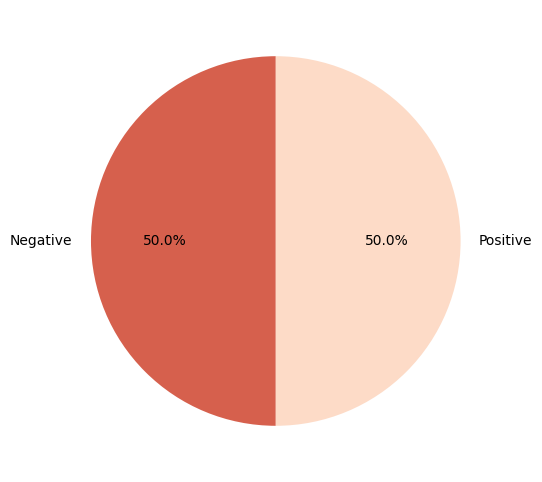

In [21]:
df_target_dist=df.groupby('sentiment').agg({'text':'count'}).reset_index()

with sns.color_palette("RdBu",4):
    plt.figure(figsize=(14,6))
    labels = df_target_dist['sentiment'].value_counts().index
    plt.pie(df_target_dist['sentiment'].value_counts(), labels= labels, startangle=90, autopct='%.1f%%')
    plt.show()

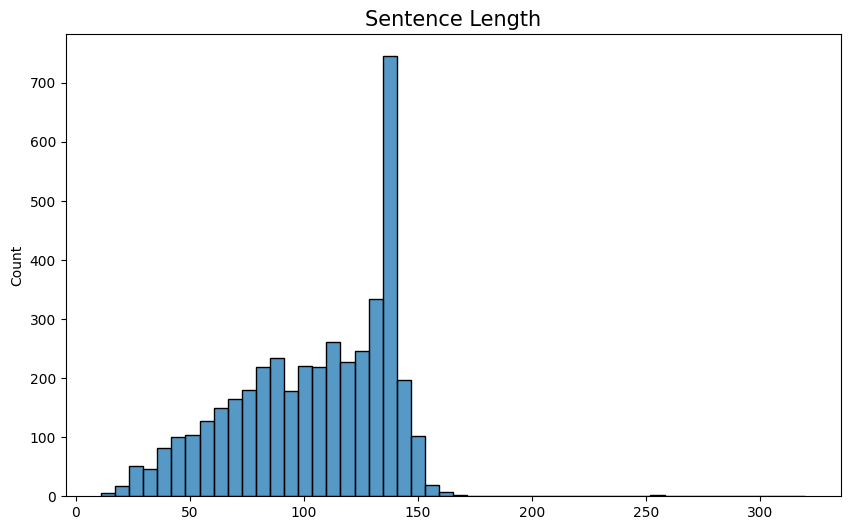

In [22]:
#plot hist of sentence length
plt.figure(figsize=(10, 6))
a=sns.histplot([len(s) for s in filtered_df.text], bins=50, palette='Set1')
a.set_title("Sentence Length",fontsize=15)
plt.show()

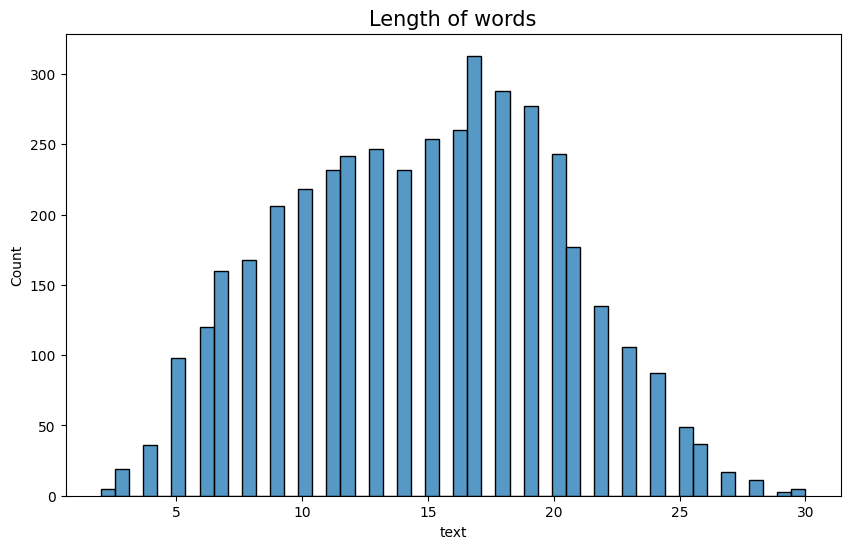

In [23]:
#plot hist of sentence length
plt.figure(figsize=(10, 6))
a=sns.histplot((filtered_df['text'].str.split().map(lambda x: len(x))), bins=50, palette='Set1')
a.set_title("Length of words",fontsize=15)
plt.show()


In [24]:
# define mapping function
sentiment_map = {'Positive': 1, 'Negative': 0}

# apply mapping function to sentiment column
df['Sentiment'] = df['sentiment'].map(sentiment_map)

In [25]:
def tweet_clean(tweet):
    tweet = re.sub(r'@[A-Za-z0-9]+'," ",tweet)            #Removing the usernames
    tweet = re.sub(r'^[A-Za-z0-9.!?]+'," ",tweet)         #Removing digits and punctuations
    tweet = re.sub(r'https?://[A-Za-z0-9./]+'," ",tweet)  #Removing link
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)            #convert "#topic" to just "topic"
    #tweet = re.sub(r"\'s", " ", tweet)
    tweet = re.sub(r"\'ve", " have ", tweet)
    #tweet = re.sub(r"n't", " not ", tweet)
    tweet = re.sub(r"\'d", " would ", tweet)
    tweet = re.sub(r"\'ll", " will ", tweet)
    tweet = tweet.lower()
    tweet = tweet.strip('. .')
    tweet = tweet.replace('.',' ')
    tweet = tweet.replace('?',' ')
    tweet = tweet.replace(',',' ')
    tweet = tweet.replace('-',' ')
    tweet = re.sub('[\s]+', ' ', tweet)                   #Correct all multiple white spaces to a single white space
    tweet = tweet.replace("’", "'").replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")
    tweet = tweet.replace("won't", "will not").replace("can't", "can not")
    tweet = tweet.replace("will not", "willnot").replace("can not", "cannot")
    tweet = tweet.replace("€", " euro ")
    tweet = tweet.replace("don't", "dont").replace("do not", "dont").replace("didn't", "didnot").replace("it's", "it is").replace("did not", "didnot")
    tweet = tweet.replace(",000,000", "m").replace("n't", " not").replace("what's", "what is")
    tweet = tweet.replace(",000", "k").replace("i'm", "i am").replace("'re", " are")
    tweet = tweet.replace("he's", "he is").replace("she's", "she is").replace("'s", " own")

    return tweet

df.text = df.text.apply(lambda x: tweet_clean(x))

In [26]:
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))


def preprocess(Tweets, stem=False):
    tokens = []
    for token in Tweets.split():
        if token not in stop_words:
                tokens.append(token)
    return " ".join(tokens)

df.text = df.text.apply(lambda x: preprocess(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
def smallwords(text):
    tokens = []
    for token in text.split():
        if len(token)>2:
          tokens.append(token)
    return " ".join(tokens)

df.text = df.text.apply(lambda x: smallwords(x))

In [28]:
df.head(5)
df3 = df.copy()

In [29]:
# Spliting dataset to negatives and positives for EDA
negatives=df['Sentiment']==0
positives=df['Sentiment']==1

# Number of words for each tweet
df['No_of_Words']=[len(text.split()) for text in df['text']]

In [30]:
from collections import Counter

df['Words'] = df['text'].apply(lambda x:str(x).split())

top_pos = Counter([word for text in df[positives]['Words'] for word in text])
top_pos_df=pd.DataFrame(top_pos.most_common(100),columns=['Words','Counts'])

top_neg = Counter([word for text in df[negatives]['Words'] for word in text])
top_neg_df=pd.DataFrame(top_neg.most_common(100),columns=['Words','Counts'])

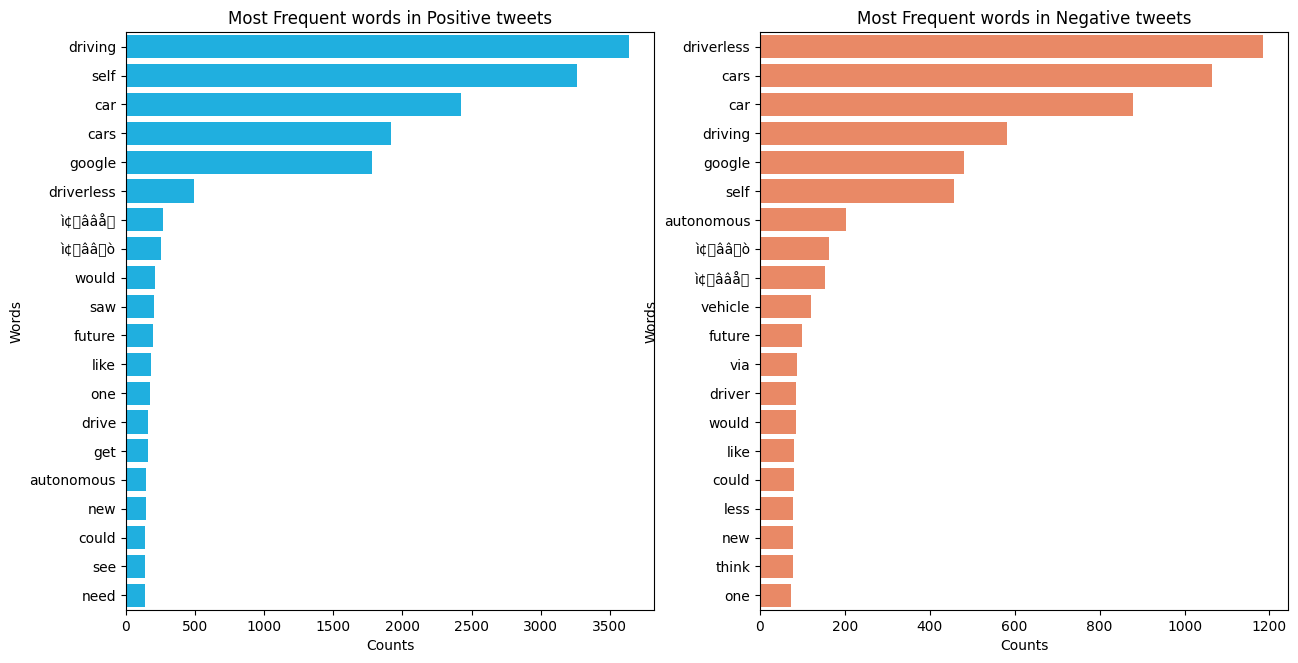

In [31]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,7.5))
sns.barplot(y='Words',x='Counts',data=top_pos_df[:20],color='deepskyblue',ax=ax[0])
sns.barplot(y='Words',x='Counts',data=top_neg_df[:20],color='coral',ax=ax[1])
ax[0].set_title("Most Frequent words in Positive tweets")
ax[1].set_title("Most Frequent words in Negative tweets")
plt.show()

In [32]:
df_pos=df[df['Sentiment']==1]
df_neg=df[df['Sentiment']==0]

In [33]:
## visualising top n-grams

def get_top_word_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_word_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

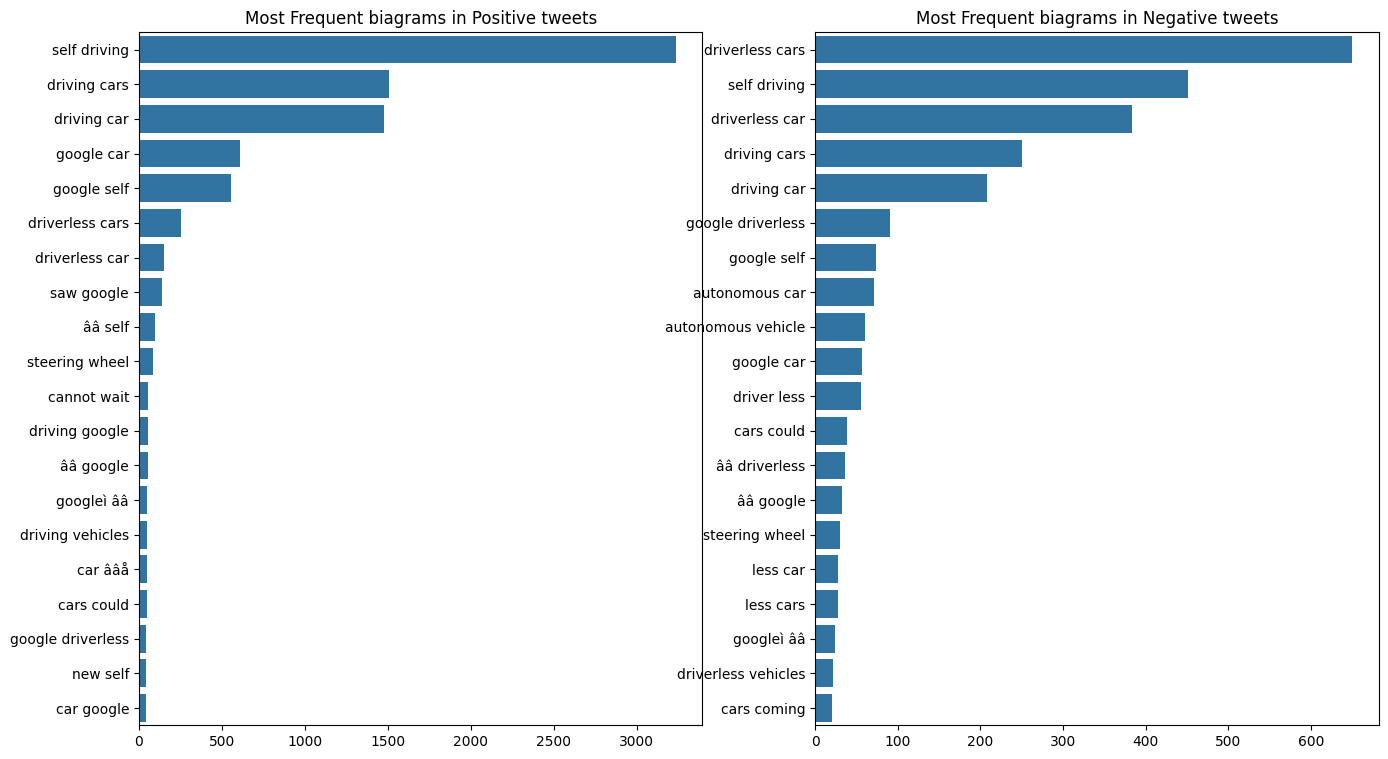

In [34]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(16,9))
top_tweet_bigrams_pos=get_top_word_bigrams(df_pos['text'])[:20]
x,y=map(list,zip(*top_tweet_bigrams_pos))
sns.barplot(x=y,y=x,ax=ax[0])
top_tweet_bigrams_neg=get_top_word_bigrams(df_neg['text'])[:20]
x,y=map(list,zip(*top_tweet_bigrams_neg))
sns.barplot(x=y,y=x,ax=ax[1])
ax[0].set_title("Most Frequent biagrams in Positive tweets")
ax[1].set_title("Most Frequent biagrams in Negative tweets")
plt.show()

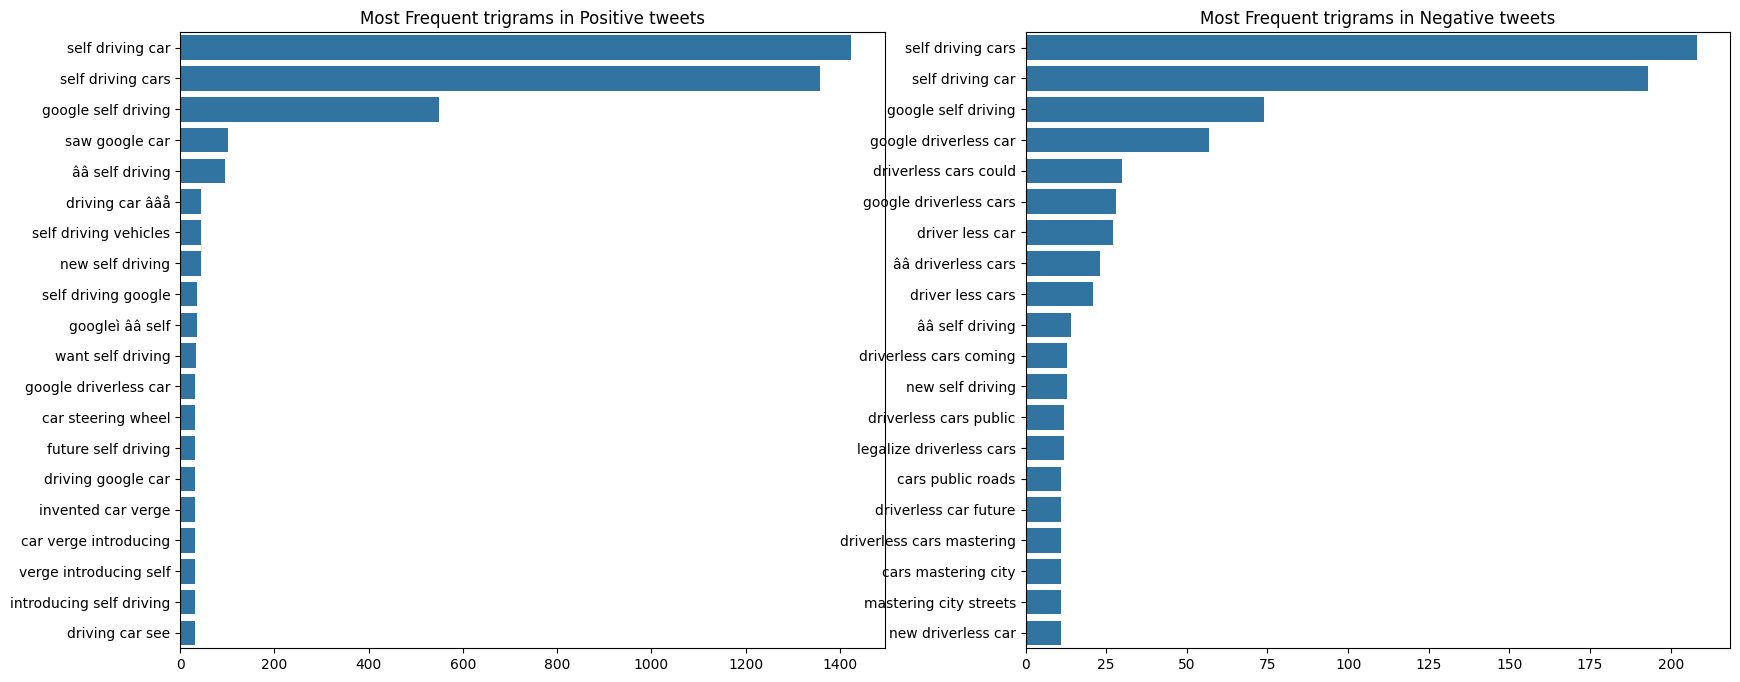

In [35]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,8))
top_tweet_trigrams_pos=get_top_word_trigrams(df_pos['text'])[:20]
x,y=map(list,zip(*top_tweet_trigrams_pos))
sns.barplot(x=y,y=x,ax=ax[0])
top_tweet_trigrams_neg=get_top_word_trigrams(df_neg['text'])[:20]
x,y=map(list,zip(*top_tweet_trigrams_neg))
sns.barplot(x=y,y=x,ax=ax[1])
ax[0].set_title("Most Frequent trigrams in Positive tweets")
ax[1].set_title("Most Frequent trigrams in Negative tweets")
plt.show()

In [36]:
df.head(2)

,sentiment,sentiment:confidence,sentiment_gold_reason,text,Sentiment,No_of_Words,Words
0,Positive,0.7579,Author is excited about the development of the...,places would invest money could: printing self...,1,9,"[places, would, invest, money, could:, printin..."
1,Positive,0.8775,Author is excited that driverless cars will be...,google driverless cars help blind travel often;,1,7,"[google, driverless, cars, help, blind, travel..."


In [37]:
df['sentiment'].value_counts()

Positive    4800
Negative    2133
Name: sentiment, dtype: int64

In [38]:
from sklearn.utils import resample

# Separate majority and minority classes
data_majority = df[df['sentiment'] == 'Positive']
data_minority = df[df['sentiment'] == 'Negative']

bias = data_minority.shape[0]/data_majority.shape[0]

# lets split train/test data first then
train = pd.concat([data_majority.sample(frac=0.8,random_state=200),
         data_minority.sample(frac=0.8,random_state=200)])

test = pd.concat([data_majority.drop(data_majority.sample(frac=0.8,random_state=200).index),
        data_minority.drop(data_minority.sample(frac=0.8,random_state=200).index)])

train = shuffle(train)
test = shuffle(test)

print('positive data in training:',(train.sentiment == 'Positive').sum())
print('negative data in training:',(train.sentiment == 'Negative').sum())
print('positive data in test:',(test.sentiment == 'Positive').sum())
print('negative data in test:',(test.sentiment == 'Negative').sum())
print("")

# Separate majority and minority classes in training data for upsampling
data_majority = train[train['sentiment'] == 'Positive']
data_minority = train[train['sentiment'] == 'Negative']

print("majority class before upsample:",data_majority.shape)
print("minority class before upsample:",data_minority.shape)
print("")

# Upsample minority class
data_minority_upsampled = resample(data_minority,
                                 replace=True,     # sample with replacement
                                 n_samples= data_majority.shape[0],    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled])

# Display new class counts
print("After upsampling\n",data_upsampled.sentiment.value_counts(),sep = "")

positive data in training: 3840
negative data in training: 1706
positive data in test: 960
negative data in test: 427

majority class before upsample: (3840, 7)
minority class before upsample: (1706, 7)

After upsampling
Positive    3840
Negative    3840
Name: sentiment, dtype: int64


In [39]:
max_fatures = 10000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['text'].values) # training with whole data

X_train = tokenizer.texts_to_sequences(data_upsampled['text'].values)
X_train = pad_sequences(X_train,maxlen=29)
y_train = pd.get_dummies(data_upsampled['Sentiment']).values
print('x_train shape:',X_train.shape)

X_test = tokenizer.texts_to_sequences(test['text'].values)
X_test = pad_sequences(X_test,maxlen=29)
y_test = pd.get_dummies(test['Sentiment']).values
print("x_test shape", X_test.shape)

x_train shape: (7680, 29)
x_test shape (1387, 29)


In [40]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

embed_dim = 128
lstm_out = 192

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X_train.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.4, recurrent_dropout=0.4))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 29, 128)           1280000   
                                                                 
 spatial_dropout1d (Spatial  (None, 29, 128)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 192)               246528    
                                                                 
 dense (Dense)               (None, 2)                 386       
                                                                 
Total params: 1526914 (5.82 MB)
Trainable params: 1526914 (5.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [41]:
from keras.callbacks import History
history = History()
batch_size = 64
# also adding weights
class_weights = {0: 1 ,
                1: 1.6/bias}

model.fit(X_train,
          y_train,
          epochs = 15,
          batch_size=batch_size,
          verbose = 1,
          class_weight=class_weights,
          validation_data=(X_test, y_test), callbacks=[history], steps_per_epoch=50)

Epoch 1/15
50/50 [==============================] - 30s 516ms/step - loss: 1.1916 - accuracy: 0.5072 - val_loss: 0.5314 - val_accuracy: 0.6943
Epoch 2/15
50/50 [==============================] - 22s 451ms/step - loss: 0.9033 - accuracy: 0.6903 - val_loss: 0.4830 - val_accuracy: 0.7844
Epoch 3/15
50/50 [==============================] - 18s 351ms/step - loss: 0.7259 - accuracy: 0.7778 - val_loss: 0.4653 - val_accuracy: 0.7988
Epoch 4/15
50/50 [==============================] - 13s 251ms/step - loss: 0.5955 - accuracy: 0.8247 - val_loss: 0.4891 - val_accuracy: 0.7974
Epoch 5/15
50/50 [==============================] - 13s 251ms/step - loss: 0.5166 - accuracy: 0.8531 - val_loss: 0.5662 - val_accuracy: 0.7945
Epoch 6/15
50/50 [==============================] - 13s 249ms/step - loss: 0.4015 - accuracy: 0.8941 - val_loss: 0.6545 - val_accuracy: 0.7599
Epoch 7/15
50/50 [==============================] - 12s 243ms/step - loss: 0.4087 - accuracy: 0.8903 - val_loss: 0.6463 - val_accuracy: 0.7570

In [42]:
y_pred = np.argmax(model.predict(X_test, batch_size=batch_size), axis=1)
df_test = pd.DataFrame({'true': y_test.tolist(), 'pred':y_pred})
df_test['true'] = df_test['true'].apply(lambda x: np.argmax(x))
print("confusion matrix",confusion_matrix(df_test.true, df_test.pred))
print(classification_report(df_test.true, df_test.pred))

22/22 [==============================] - 2s 59ms/step
confusion matrix [[166 261]
 [ 65 895]]
              precision    recall  f1-score   support

           0       0.72      0.39      0.50       427
           1       0.77      0.93      0.85       960

    accuracy                           0.76      1387
   macro avg       0.75      0.66      0.68      1387
weighted avg       0.76      0.76      0.74      1387



In [43]:
print("Label balance of train is "+str(y_train.sum()/len(y_train))+". \
      For test is "+str(y_test.sum()/len(y_test)))

Label balance of train is 1.0.       For test is 1.0


In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

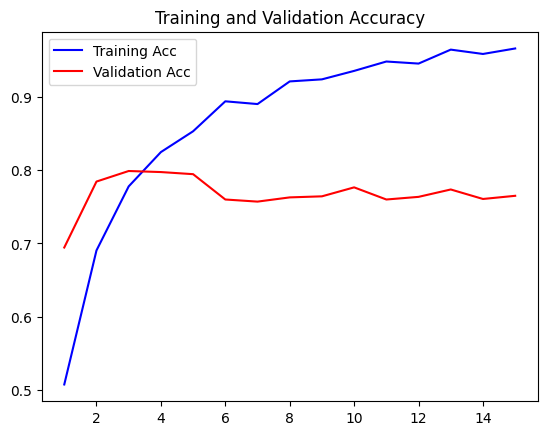

In [45]:
plt.plot(epochs, acc, label='Training Acc', color='blue')
plt.plot(epochs, val_acc, label='Validation Acc', color='red')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

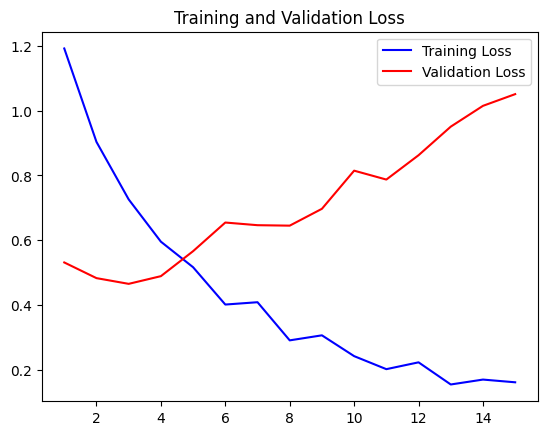

In [46]:
plt.plot(epochs, loss, label='Training Loss', color='blue')
plt.plot(epochs, val_loss, label='Validation Loss', color='red')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [47]:
y_pred = np.argmax(model.predict(X_test, batch_size=batch_size), axis=1)

df_test = pd.DataFrame({'true': np.argmax(y_test, axis=1), 'pred': y_pred})
print("confusion matrix", confusion_matrix(df_test.true, df_test.pred))
print(classification_report(df_test.true, df_test.pred))

22/22 [==============================] - 1s 40ms/step
confusion matrix [[166 261]
 [ 65 895]]
              precision    recall  f1-score   support

           0       0.72      0.39      0.50       427
           1       0.77      0.93      0.85       960

    accuracy                           0.76      1387
   macro avg       0.75      0.66      0.68      1387
weighted avg       0.76      0.76      0.74      1387



In [48]:
def model_Evaluate(model):
    try:
        # Predict values for Test dataset
        y_pred = model.predict(X_test)

        # Convert y_test from one-hot encoding to binary target form
        y_test_binary = np.argmax(y_test, axis=1)

        # Print the evaluation metrics for the dataset.
        print(classification_report(y_test_binary, y_pred))

        # Compute and plot the Confusion matrix
        cf_matrix = confusion_matrix(y_test_binary, y_pred)

    except:
        # Predict values for Test dataset
        y_pred = model.predict(X_test)

        # Print the evaluation metrics for the dataset.
        print(classification_report(y_test, y_pred))

        # Compute and plot the Confusion matrix
        cf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.33      0.52      0.40       427
           1       0.71      0.52      0.60       960

    accuracy                           0.52      1387
   macro avg       0.52      0.52      0.50      1387
weighted avg       0.59      0.52      0.54      1387



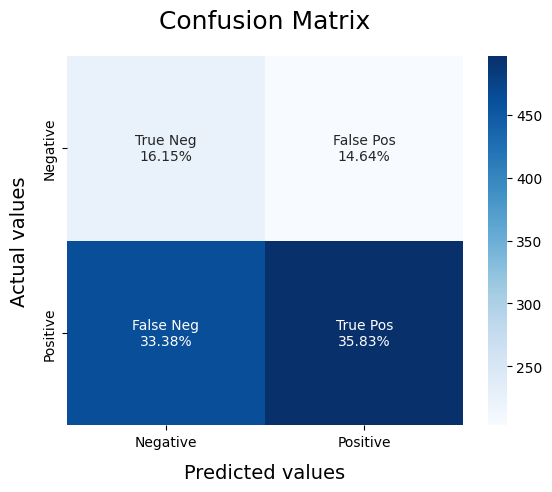

In [49]:
# For logistic regression
lr = LogisticRegression()
lr.fit(X_train, np.argmax(y_train, axis=1))
prediction_lr = lr.predict(X_test)
model_Evaluate(lr)

Accuracy: 0.7390050468637347
              precision    recall  f1-score   support

           0       0.58      0.54      0.56       427
           1       0.80      0.83      0.81       960

   micro avg       0.74      0.74      0.74      1387
   macro avg       0.69      0.68      0.69      1387
weighted avg       0.73      0.74      0.74      1387
 samples avg       0.74      0.74      0.74      1387



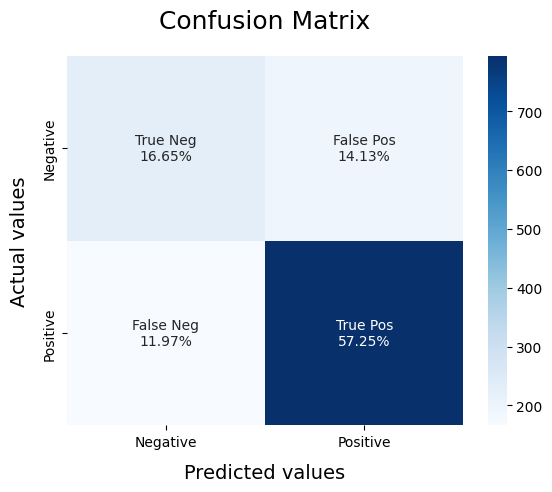

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# For decision tree classifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

model_Evaluate(classifier)

In [51]:
# Import necessary libraries
from pylab import rcParams
from matplotlib import rc
from collections import defaultdict
from textwrap import wrap

# Torch ML libraries
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

import warnings
warnings.filterwarnings('ignore')

In [52]:
data_upsampled.head(1)

,sentiment,sentiment:confidence,sentiment_gold_reason,text,Sentiment,No_of_Words,Words
1885,Positive,0.7515,NaN,cannot wait self driving cars become mainstrea...,1,10,"[cannot, wait, self, driving, cars, become, ma..."


In [53]:
df.head(5)
df7 = df.copy()

In [54]:
# Select 1000 positive examples
positive_df = df7[df7['sentiment'] == 'Positive'].sample(n=1000, random_state=42)

# Select 1000 negative examples
negative_df = df7[df7['sentiment'] == 'Negative'].sample(n=1000, random_state=42)

# Concatenate the positive and negative examples
df7 = pd.concat([positive_df, negative_df], ignore_index=True)

# # Shuffle the subset dataframe
df7 = df7.sample(frac=1, random_state=0)

In [58]:
print(df7['sentiment'].value_counts())
df7 = df7.drop(labels=['sentiment:confidence', 'No_of_Words','sentiment', 'Words', 'sentiment_gold_reason'], axis=1)
df7.head(5)

Positive    1000
Negative    1000
Name: sentiment, dtype: int64


,text,Sentiment
405,cars! that! less people behind wheel texting p...,1
1190,fud self driving cars already starts,0
1132,saw google self driving car going 75+ mph 280 ...,0
731,self driving cars programmable clothes two thi...,1
1754,"""you struck google self driving car please rem...",0


In [59]:
from transformers import AutoTokenizer, TFAutoModel
from IPython.display import clear_output

checkpoint = "bert-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = TFAutoModel.from_pretrained(checkpoint, output_hidden_states=True)
clear_output()

In [60]:
for col in df7.columns:
    pct_missing = df7[col].isnull().mean()
    print(f'{col} - {pct_missing :.1%}')

df7.dropna(inplace=True)

text - 0.0%
Sentiment - 0.0%


In [61]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

sequences, test_val_sequences = train_test_split(df7, test_size=0.2,
                                             stratify=df7.Sentiment, random_state=44)
val_sequences, test_sequences = train_test_split(test_val_sequences, test_size=0.5,
                                             stratify=test_val_sequences.Sentiment, random_state=44)
dataset = {
    "TRAIN": sequences['text'].values.tolist(),
    "TEST": test_sequences['text'].values.tolist(),
    "VAL": val_sequences['text'].values.tolist()
}
targets = {
    "TRAIN": sequences['Sentiment'].values.tolist(),
    "TEST": test_sequences['Sentiment'].values.tolist(),
    "VAL": val_sequences['Sentiment'].values.tolist()
}

In [62]:
def tokenization(data, **kwargs):
    return tokenizer(data,
                   padding=kwargs.get('padding','longest'),
                   max_length=kwargs.get('max_length',40),
                   truncation=True,
                   return_tensors="tf")

In [63]:
def get_model(**kwargs):
    max_seq_length = kwargs.get('max_seq_length',40)

    input_ids = tf.keras.Input(shape=(max_seq_length,),dtype='int32')
    attention_mask = tf.keras.Input(shape=(max_seq_length,),dtype='int32')

    transformer = model({'input_ids':input_ids, 'attention_mask':attention_mask},
                        training=False)
    pooler_output  = transformer["pooler_output"]

    # Model Head
    h1 = tf.keras.layers.Dense(32, activation='relu')(pooler_output)
    dropout = tf.keras.layers.Dropout(0.2)(h1)
    output = tf.keras.layers.Dense(1, activation='sigmoid')(dropout)

    new_model = tf.keras.models.Model(inputs = [input_ids, attention_mask],
                                      outputs = output)
    new_model.compile(tf.keras.optimizers.Adam(learning_rate=1e-5),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

    return new_model

In [64]:
def test_result(model):
    test_inputs = tokenization(dataset["TEST"])
    result_proba = model.predict([test_inputs.input_ids, test_inputs.attention_mask])
    # Convert probabilities to binary predictions
    result = (result_proba > 0.5).astype(int).flatten()

    # Convert targets['TEST'] to array
    true_labels = np.array(targets['TEST'])

    print(classification_report(true_labels, result))
    return result_proba, result

In [65]:
from sklearn.metrics import classification_report

def test_result(model):
    test_inputs = tokenization(dataset["TEST"])
    result_proba = model.predict([test_inputs.input_ids, test_inputs.attention_mask])
    result = np.array(result_proba).ravel().tolist()
    result = [1 if x > 0.5 else 0 for x in result]
    print(classification_report(targets['TEST'], result))
    return result_proba, result

In [66]:
new_model = get_model()
result_before_all = test_result(new_model)
result_proba_before, result_before = result_before_all[0], result_before_all[1]

7/7 [==============================] - 41s 5s/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.50      1.00      0.67       100

    accuracy                           0.50       200
   macro avg       0.25      0.50      0.33       200
weighted avg       0.25      0.50      0.33       200



In [67]:
# Get a smaller subset of the data for tokenization
train_subset_size = 800
train_subset = dataset['TRAIN'][:train_subset_size]

# Tokenize the smaller subset of the data
inputs_subset = tokenization(train_subset)
train_targets_subset = tf.convert_to_tensor(targets['TRAIN'][:train_subset_size])

val_inputs = tokenization(dataset['VAL'])
val_targets = tf.convert_to_tensor(targets['VAL'])

new_model.compile(optimizer='adam', loss='binary_crossentropy', run_eagerly=True)


# Train the model on the smaller subset of the tokenized data
new_model.fit([inputs_subset['input_ids'], inputs_subset['attention_mask']],
              train_targets_subset,
              validation_data = ([val_inputs['input_ids'], val_inputs['attention_mask']], val_targets),
              epochs=2,
              batch_size=32)

Epoch 1/2
25/25 [==============================] - 449s 18s/step - loss: 0.9731 - val_loss: 0.7201
Epoch 2/2
25/25 [==============================] - 426s 17s/step - loss: 0.7131 - val_loss: 0.6957


In [68]:
result_proba_after, result_after = test_result(new_model)

7/7 [==============================] - 29s 4s/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.50      1.00      0.67       100

    accuracy                           0.50       200
   macro avg       0.25      0.50      0.33       200
weighted avg       0.25      0.50      0.33       200



In [72]:
import pandas as pd
import random
from collections import Counter


test_data = pd.read_csv('Twitter-sentiment-self-drive-DFE.csv', encoding='latin-1')


sentiment_counts = Counter(test_data['sentiment'])


actual_sentiments = test_data['sentiment'].tolist()
num_iterations = 1000
accuracies = []


for _ in range(num_iterations):
    predicted_sentiments = []

    for _ in range(len(test_data)):

        sentiments = random.choices(list(sentiment_counts.keys()), list(sentiment_counts.values()))[0]
        predicted_sentiments.append(sentiments)


    correct_predictions = sum(1 for pred, actual in zip(predicted_sentiments, actual_sentiments) if pred == actual)
    accuracy = correct_predictions / len(predicted_sentiments)
    accuracies.append(accuracy)


average_accuracy = sum(accuracies) / num_iterations


print("Average Accuracy:", average_accuracy)

Average Accuracy: 0.40716168250419144


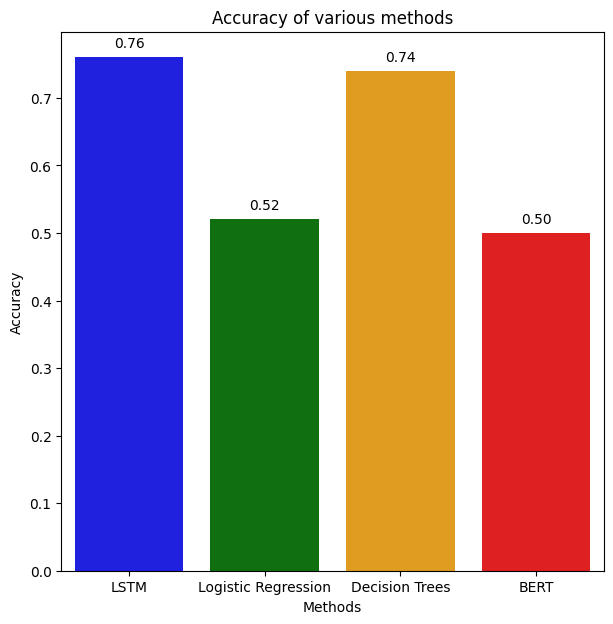

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

d = {'Methods': ['LSTM', 'Logistic Regression', 'Decision Trees', 'BERT'], 'Accuracy': [0.76, 0.52, 0.74, 0.50]}

dfc = pd.DataFrame(data=d)

# Specify custom colors for each bar
colors = ['blue', 'green', 'orange', 'red']

plt.figure(figsize=(7, 7))
ax = sns.barplot(x='Methods', y='Accuracy', data=dfc, palette=colors, errwidth=0)

# Manually add labels above the bars
for p, label in zip(ax.patches, dfc['Accuracy']):
    ax.annotate(f'{label:.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Accuracy of various methods')
plt.show()